In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro

In [22]:
pip install mplcursors

     ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
     ------------- ------------------------ 30.7/88.8 kB 435.7 kB/s eta 0:00:01
     ------------- ------------------------ 30.7/88.8 kB 435.7 kB/s eta 0:00:01
     ------------- ------------------------ 30.7/88.8 kB 435.7 kB/s eta 0:00:01
     ----------------- -------------------- 41.0/88.8 kB 178.6 kB/s eta 0:00:01
     ------------------------------ ------- 71.7/88.8 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 88.8/88.8 kB 314.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20745 sha256=df8f666c9a3bc32a8684b23c1


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import mplcursors

In [26]:
# Load the data
data = pd.read_csv("E:\\UNI\\4th Year 1st sem\\ST 4031-Introduction to Stochastic Processes\\Assiignment 2\\HASU Historical Data(2).csv")  # replace with your actual file path

In [27]:
data.head()

,Date,Price
0,6/20/2022,32.2
1,6/21/2022,33.0
2,6/22/2022,33.0
3,6/23/2022,33.0
4,6/24/2022,35.0


In [28]:
closing_prices = data['Price']  
closing_prices

0      32.2
1      33.0
2      33.0
3      33.0
4      35.0
       ... 
493    58.0
494    57.8
495    58.0
496    58.1
497    58.2
Name: Price, Length: 498, dtype: float64

In [34]:
%matplotlib notebook

**a)**

<IPython.core.display.Javascript object>


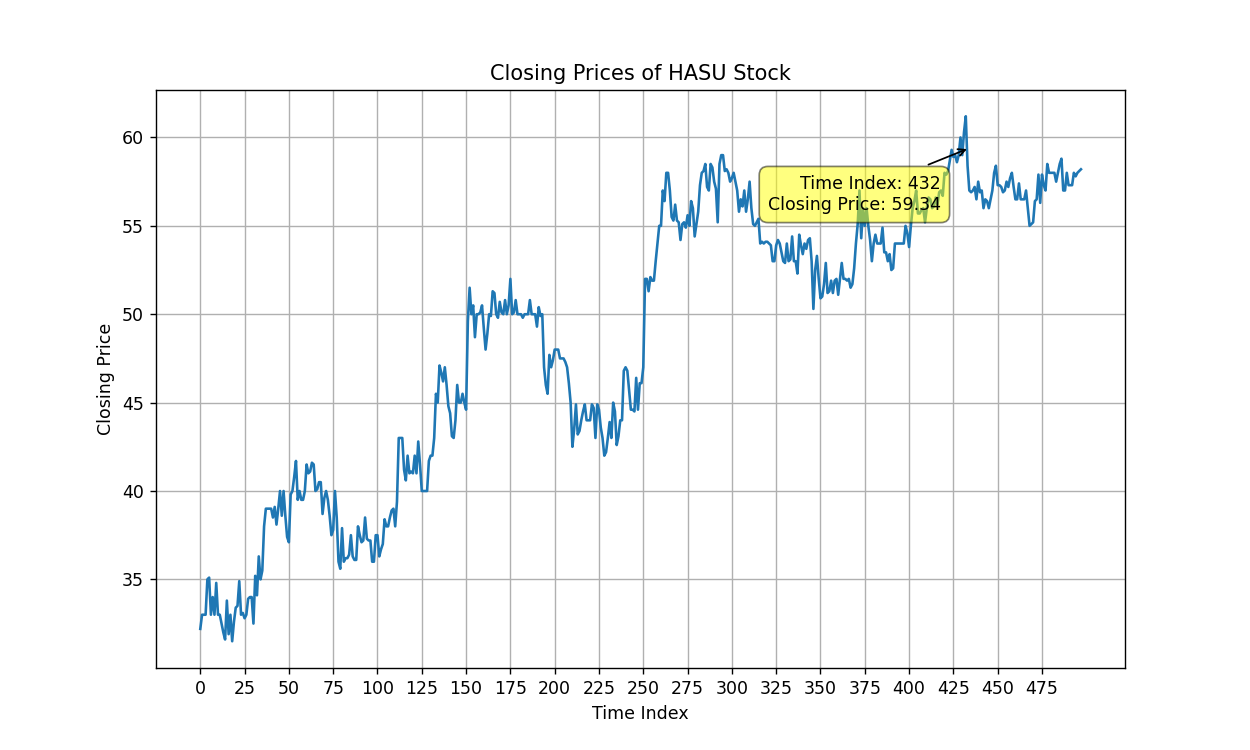

In [35]:
# Create time index
time_index = np.arange(len(closing_prices))

# Plot closing prices
plt.figure(figsize=(10, 6))
line, = plt.plot(time_index, closing_prices, label='Closing Prices')
plt.grid()
plt.xlabel('Time Index')
plt.ylabel('Closing Price')
plt.title('Closing Prices of HASU Stock')

plt.xticks(np.arange(0, len(closing_prices), 25))

cursor = mplcursors.cursor(line, hover=True)

@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=f'Time Index: {int(sel.target[0])}\nClosing Price: {sel.target[1]:.2f}')

plt.show()

**b)** follows a normal distribution

**c)** Using the log returns, we estimate the drift (
𝜇
GB
​
 ) and scale (
σ) parameters

In [32]:
# Calculate log returns
log_returns = np.log(closing_prices[1:].values) - np.log(closing_prices[:-1].values)

# Estimate drift (mu_GB) and scale (sigma) parameters
mu_GB = np.mean(log_returns)
sigma = np.std(log_returns)

print(f"Estimated Drift (mu_GB): {mu_GB}")
print(f"Estimated Scale (sigma): {sigma}")

Estimated Drift (mu_GB): 0.0011909837066137418
Estimated Scale (sigma): 0.02335848669942491


**d)** To check if it's appropriate to model the closing price using GBM, we should:

1) Plot the log returns and check for normality.
2) Perform a statistical test (e.g., Shapiro-Wilk test) to check for normality.
3) Check for constant variance (homoscedasticity).

<IPython.core.display.Javascript object>


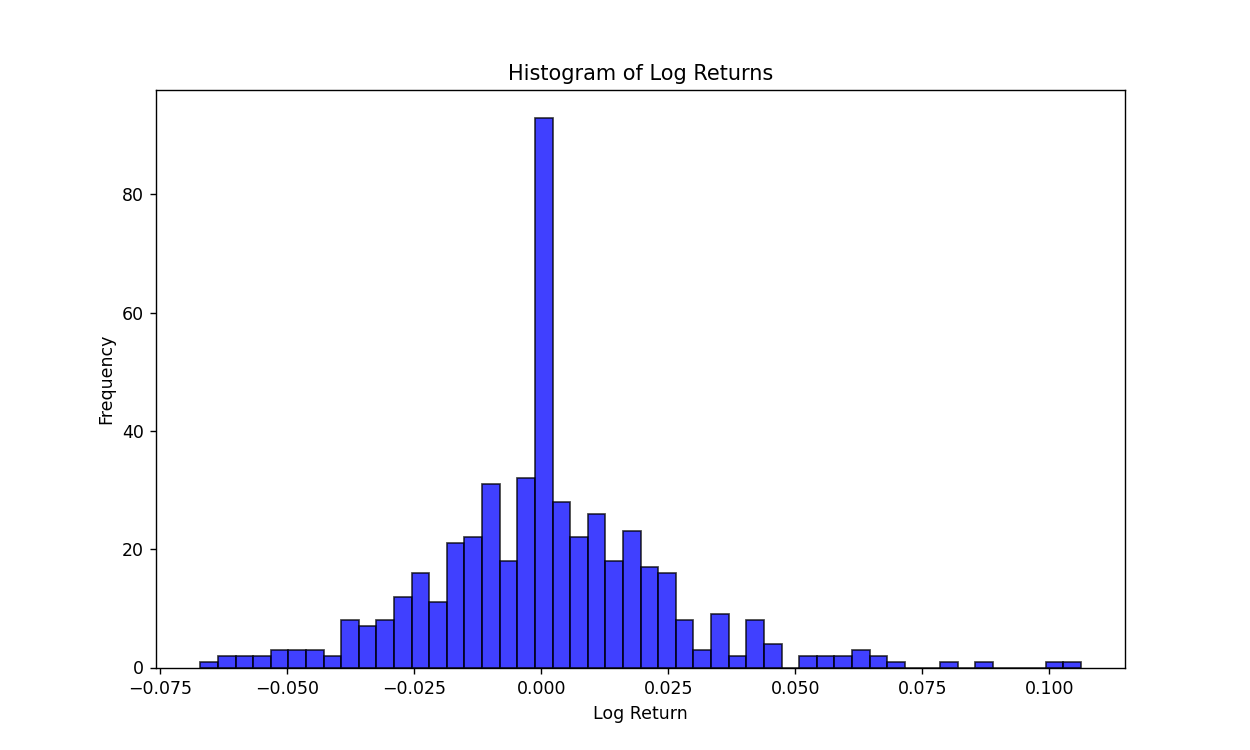

Shapiro-Wilk test statistic: 0.963689923286438, p-value: 9.790684929456006e-10


In [37]:
# Plot histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=50, alpha=0.75, color='blue',edgecolor="black")
plt.title('Histogram of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

# Perform Shapiro-Wilk test
shapiro_test = shapiro(log_returns)
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

We can see the normality using histogram and from shapiro-wilk test since it's closer to 1 

**e) & f)**

<IPython.core.display.Javascript object>


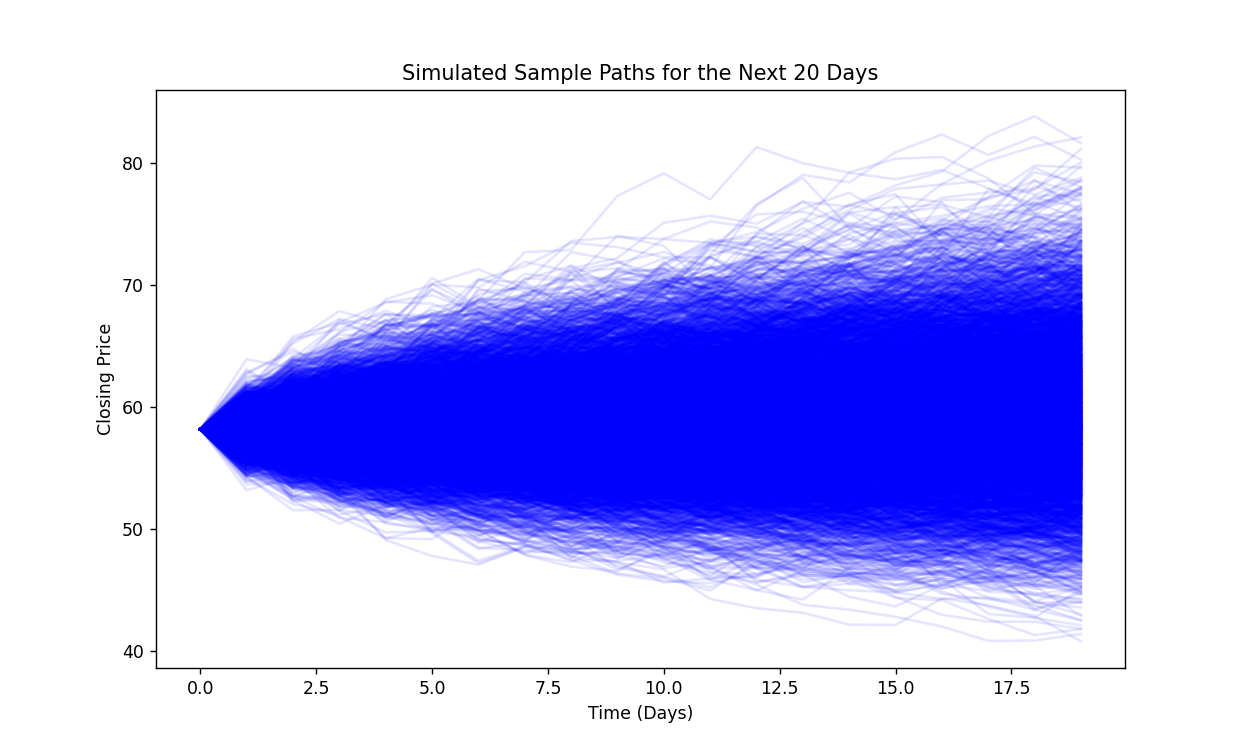

In [38]:
# Parameters for simulation
S0 = closing_prices.iloc[-1]  # Last observed price
T = 20  # Time period (20 days)
n_simulations = 5000
dt = 1  # Time step (daily)

# Simulate paths
simulated_paths = np.zeros((T, n_simulations))
simulated_paths[0] = S0

for t in range(1, T):
    Z = np.random.standard_normal(n_simulations)
    simulated_paths[t] = simulated_paths[t-1] * np.exp((mu_GB - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Plot sample paths
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(simulated_paths[:, i], color='blue', alpha=0.1)
plt.title('Simulated Sample Paths for the Next 20 Days')
plt.xlabel('Time (Days)')
plt.ylabel('Closing Price')
plt.show()

**g)**

<IPython.core.display.Javascript object>


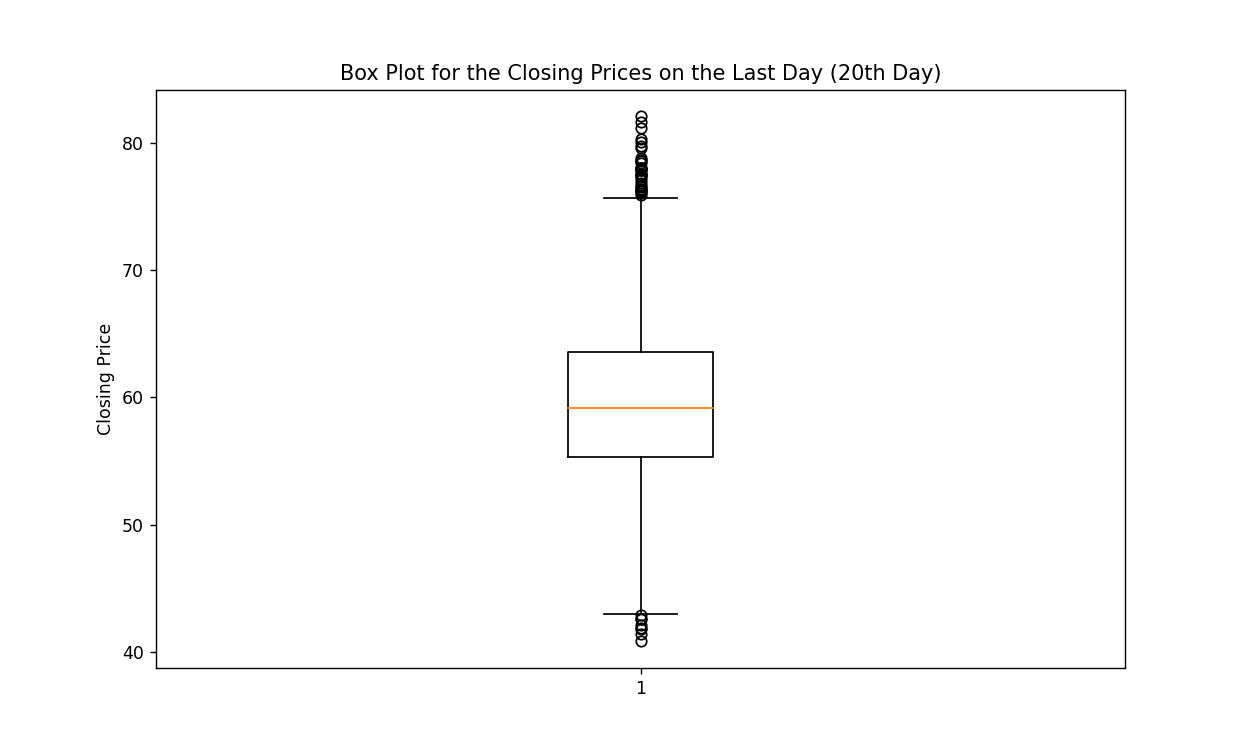

In [39]:
# Box plot for the last day's prices
plt.figure(figsize=(10, 6))
plt.boxplot(simulated_paths[-1])
plt.title('Box Plot for the Closing Prices on the Last Day (20th Day)')
plt.ylabel('Closing Price')
plt.show()

**h)**

In [40]:
last_day_prices = simulated_paths[-1]
prob_55_60 = np.mean((last_day_prices >= 55) & (last_day_prices <= 60))
print(f"Probability that the closing price is between 55 and 60: {prob_55_60}")

Probability that the closing price is between 55 and 60: 0.317


**i)**

In [41]:
prediction_interval = np.percentile(last_day_prices, [2.5, 97.5])
print(f"95% Prediction Interval: {prediction_interval}")

95% Prediction Interval: [48.20170149 72.11560361]
